# My riad challenge

## Introducción

En este reto vamos a intentar predecir si una serie temporal es real o sintética. Para ello, implementamos distintos algoritmos de clasificación.

Primero realizamos una examinación de los datos, donde comprobamos la calidad de los datos y realizamos una gráfica con dos series temporales para compararlas 


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df1=pd.read_csv('MyriadChallenge/TrainMyriad.csv')
dftest=pd.read_csv('MyriadChallenge/TestMyriad.csv')

In [74]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,Class
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.000486,0.001032,0.001140,7.375817e-04,4.459286e-04,0.000237,8.479412e-04,1.308039e-03,9.231755e-04,0.000316,...,0.000285,0.000430,0.001387,0.000536,0.000192,9.216463e-04,0.000796,0.000325,0.000477,0.489400
std,0.022064,0.024896,0.022821,2.281738e-02,2.269435e-02,0.023668,2.315789e-02,2.310966e-02,2.291001e-02,0.022837,...,0.021994,0.022217,0.022296,0.023514,0.021520,2.250196e-02,0.021300,0.023569,0.023480,0.499938
min,-0.193774,-0.191102,-0.139600,-3.816964e-01,-2.283394e-01,-0.232066,-2.335412e-01,-1.844170e-01,-2.428337e-01,-0.182250,...,-0.337433,-0.137577,-0.179889,-0.227332,-0.138384,-2.072785e-01,-0.149109,-0.185041,-0.239711,0.000000
25%,-0.008880,-0.008409,-0.008510,-8.872927e-03,-8.683706e-03,-0.009016,-8.697229e-03,-8.425944e-03,-8.296891e-03,-0.008705,...,-0.008948,-0.009055,-0.008167,-0.008997,-0.008965,-8.153697e-03,-0.008501,-0.009011,-0.008921,0.000000
50%,0.000000,0.000000,0.000000,1.000000e-10,1.500000e-10,0.000000,1.000000e-10,5.000000e-10,1.000000e-10,0.000000,...,0.000000,-0.000000,0.000360,0.000000,0.000000,1.000000e-10,0.000000,0.000000,-0.000000,0.000000
75%,0.009719,0.010044,0.009643,9.812382e-03,1.003389e-02,0.009271,1.018698e-02,1.067033e-02,9.931832e-03,0.009547,...,0.009287,0.009685,0.010718,0.009564,0.009604,1.007285e-02,0.009921,0.009582,0.009870,1.000000
max,0.230594,0.404144,0.247719,1.979167e-01,2.180451e-01,0.305483,2.560722e-01,2.219020e-01,1.985068e-01,0.280512,...,0.210317,0.265522,0.171965,0.343498,0.154339,2.005155e-01,0.174033,0.587822,0.287783,1.000000


In [75]:
df1.describe().mean(axis=1)

count    5000.000000
mean        0.002544
std         0.025137
min        -0.246661
25%        -0.008632
50%         0.000012
75%         0.013570
max         0.289092
dtype: float64

In [76]:
x_tr=df1.drop(columns=['Class'])
y_tr=df1['Class']

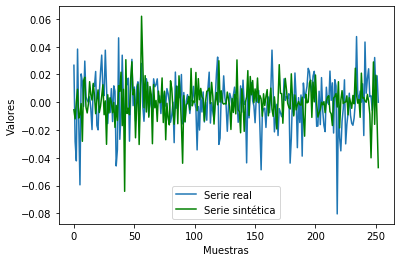

La línea azul corresponde a una serie: 1.0
La línea verde corresponde a una serie: 0.0


In [77]:
x=df1.iloc[500].values
x1=df1.iloc[4001].values

plt.plot(x[:len(x)-1], label='Serie real')
plt.plot(x1[:len(x)-1],c='g', label='Serie sintética')
plt.ylabel('Valores')
plt.xlabel('Muestras')
plt.legend()
plt.show()

print('La línea azul corresponde a una serie:', x[-1])
print('La línea verde corresponde a una serie:', x1[-1])

## Decision tree

En este apartado, hemos separado los datos del enternamiento en dos grupos:
    - Train (75%)
    - Test (25%)

Una vez hecha esta separación, creamos un ábol de decisión con una profundidad máxima de 7. Como podemos comprobar, la precisión del modelo sobre el Train es de un 69.3% y 52.0% sobre el Test. Esta precisión se podría mejorar sobre el Train si aumentamos la profundidad pero no nos interesa para no tener overfitting.  

Por último, realizamos una representación del árbol de decisión donde podemos comprobar las decisiones que toma el algoritmo. Como se muestra en la tabla inferior, la precisión de este algoritmo se asemeja a una distribución binomial. Por tanto, podemos afirmar que es un algoritmo ineficiente.

| Grupo | Precisión |
|:----------:|:-----:|
| Train | 69.3 % |
| Test | 52.0 % |

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, random_state=1 )

In [80]:
tree = DecisionTreeClassifier(max_depth=7, random_state=0)

tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [81]:
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.693/0.520


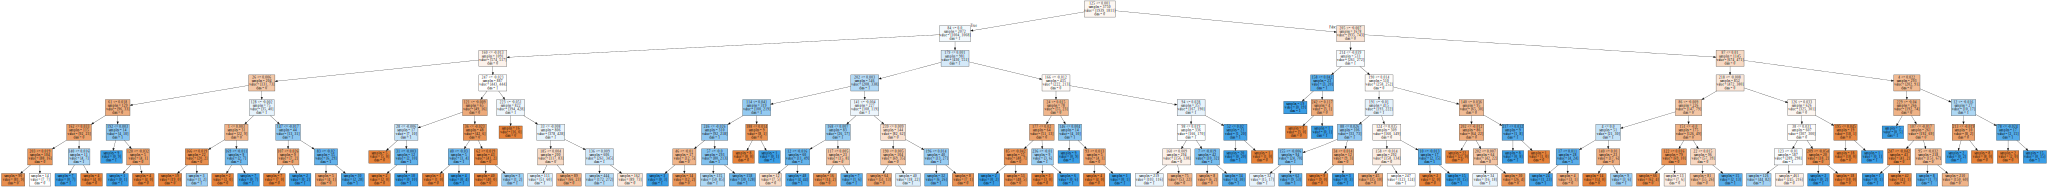

In [82]:
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
feature_names=x_tr.columns.values, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


## Adaboost

En esta sección, comprobamos el algoritmo Adaptive Boosting y vemos una mejoría de la precisión en el Train hasta alcanzar un 100.0%. Sin embargo, la predicción en el Test se mantiene practicamente constante con un 51.8%. Como comentamos en el apartado anterior esto se debe a un overfitting en el Train, que provoca una peor predicción del Test. Por tanto, podemos descartar directamente este algoritmo para este caso.

| Grupo | Precisión |
|:----------:|:-----:|
| Train | 100.0 % |
| Test | 51.8 % |

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [86]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=50, learning_rate=.5, random_state=1)

ada = ada.fit(X_train, y_train)

In [87]:
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Precisión modelo con AdaBoost train/test  {0:.3f}/{1:.3f}'
      .format(ada_train, ada_test))

Precisión modelo con AdaBoost train/test  1.000/0.511


# SVM



In [52]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [53]:
svc=svm.SVC(C= 1000, gamma= 'scale', kernel= 'rbf', probability=True)
param_grid = {'kernel':['linear','rbf','poly'], 'C':[1,10,1000], 'gamma':['scale', 'auto']}

In [24]:
svc_cv = GridSearchCV(svc, param_grid, cv=10)

In [26]:
svc_cv.best_params_
# svc_cv.best_score_

{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}

In [54]:
svc=svm.SVC(C= 1000, gamma= 'scale', kernel= 'rbf', probability=True)
svc.fit(X_train, y_train)



SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(svc.score(X_train, y_train), svc.score(X_test, y_test)))

Precisión modelo inicial train/test  1.000/0.530


#  Voting classifier and average


In [59]:
np.corrcoef(tree.predict(X_test),svc.predict(X_test) )

array([[1.        , 0.02309339],
       [0.02309339, 1.        ]])

In [60]:
np.corrcoef(svc.predict(X_test),ada.predict(X_test) )

array([[1.        , 0.17898682],
       [0.17898682, 1.        ]])

In [16]:
from sklearn.ensemble import VotingClassifier


In [30]:
eclf2 = VotingClassifier(estimators=[('lr', tree), ('rf', rf), ('gnb', svc)],voting='hard')

In [31]:
eclf2 = eclf2.fit(X_train, y_train)

In [32]:
eclf2.score(X_test,y_test)

0.516

In [33]:
pred1=tree.predict_proba(X_test) 
pred2=model.predict_proba(X_test) 
pred3=svc.predict_proba(X_test) 

finalpred=(pred1+pred2+pred3)/3

In [34]:
roc_auc_score(y_test, finalpred[:, 1])

0.497329572654824

# Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf= RandomForestClassifier(n_estimators=1000)

rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
rf.score(X_test,y_test)

0.5168